In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [15]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    w = np.dot(np.dot(np.linalg.inv(np.dot(tx.T, tx)), tx.T), y)
    return w

def calculate_mse(y, tx, w):
  error = y - np.dot(tx, w)
  return np.dot(error.T, error) / error.shape[0]


### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [4]:
from helpers import *
def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least square or grid search: TODO
    # this code should compare the optimal weights obtained 
    # by least squares vs. grid search
    # ***************************************************
    w = least_squares(y, tx)
    print(w)
    print(calculate_mse(y, tx, w))


    best_w = None
    best_error = 1e9

    for i in range(0, 100, 1):
      for j in range(0, 100, 1):
        w = np.array([i, j])
        err = mse(y, tx, w)
        if err < best_error:
          best_error = err
          best_w = w
    print(best_w, best_error)

Test it here

In [5]:
test_your_least_squares()

OSError: ignored

## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [6]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [25]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # polynomial basis function: TODO
    # this function should return the matrix formed
    # by applying the polynomial basis to the input data
    # ***************************************************

    x = np.reshape(x, (-1, 1))
    return np.hstack([x**j for j in range (0, degree)])

poly_x = build_poly(x, 3)


(50, 3)
[[1.00000000e+00 3.52374910e-01 1.24168077e-01]
 [1.00000000e+00 4.89512330e+00 2.39622321e+01]
 [1.00000000e+00 1.86662437e+00 3.48428655e+00]
 [1.00000000e+00 3.50706129e+00 1.22994789e+01]
 [1.00000000e+00 3.38087384e+00 1.14303079e+01]
 [1.00000000e+00 7.30937276e-01 5.34269301e-01]
 [1.00000000e+00 3.88562366e+00 1.50980712e+01]
 [1.00000000e+00 5.65224803e+00 3.19479078e+01]
 [1.00000000e+00 6.28318531e+00 3.94784176e+01]
 [1.00000000e+00 2.37137419e+00 5.62341557e+00]
 [1.00000000e+00 6.04749821e-01 3.65722346e-01]
 [1.00000000e+00 3.63324875e+00 1.32004965e+01]
 [1.00000000e+00 8.57124731e-01 7.34662804e-01]
 [1.00000000e+00 2.49756165e+00 6.23781420e+00]
 [1.00000000e+00 1.61424946e+00 2.60580133e+00]
 [1.00000000e+00 5.39987312e+00 2.91586297e+01]
 [1.00000000e+00 6.15699785e+00 3.79086225e+01]
 [1.00000000e+00 6.03081040e+00 3.63706740e+01]
 [1.00000000e+00 4.78562366e-01 2.29021938e-01]
 [1.00000000e+00 2.87612401e+00 8.27208935e+00]
 [1.00000000e+00 4.51656093e+00 

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [30]:
from plots import *

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # form the data to do polynomial regression.: TODO
        # ***************************************************
        poly_x = build_poly(x, degree)
        weights = least_squares(y, poly_x)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # least square and calculate RMSE: TODO
        # ***************************************************
        rmse = calculate_mse(y, poly_x, weights)
        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weights, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()

Run polynomial regression

Processing 1th experiment, degree=1, rmse=0.5010949203781333
Processing 2th experiment, degree=3, rmse=0.21807215932854132
Processing 3th experiment, degree=7, rmse=0.062349542032100295
Processing 4th experiment, degree=12, rmse=0.06194920556375798


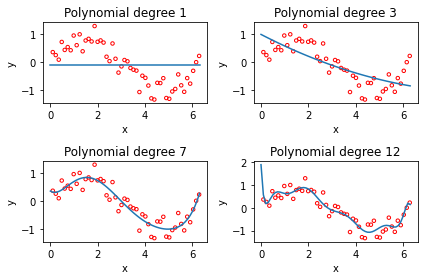

In [31]:
polynomial_regression()

# 2 Evaluating model predication performance


Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [ ]:
import math

def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8 
    you will have 80% of your data set dedicated to training 
    and the rest dedicated to testing
    """
    # set seed
    np.random.seed(seed)
    rand_permutation = np.random.permutation(x.shape[0])
    shuffled_x = x[rand_permutation]
    shuffled_y = y[rand_permutation]

    train_size = math.floor(x.shape[0] * ratio)
    x_train = shuffled_x[:train_size]
    x_validate = shuffled_x[train_size:]
    y_train = shuffled_y[:train_size]
    y_validate = shuffled_y[train_size:]

    return x_train, x_validate, y_train, y_validate

Then, test your `split_data` function below.

In [ ]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    x_train, x_validate, y_train, y_validate = split_data(x, y, ratio)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    x_train_poly = build_poly(x_train, degree)
    x_validate_poly = build_poly(x_test, degree)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate weight through least square: TODO
    # ***************************************************
    weights = least_squares(y_train, x_train_poly)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate RMSE for train and test data,
    # and store them in rmse_tr and rmse_te respectively: TODO
    # ***************************************************
    rmse_tr = calculate_mse(y_train, x_train_poly, weights)
    rmse_te = calculate_mse(y_validate, x_validate_poly)
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))


In [ ]:
seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

# 3 Ridge Regression
Please fill in the function below.

In [ ]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    raise NotImplementedError

In [ ]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    raise NotImplementedError

    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # ridge regression with a given lambda
        # ***************************************************
        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)

    raise NotImplementedError


In [ ]:
seed = 56
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)